In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
IMG_SIZE =224
BATCH_SIZE=11

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle =True,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

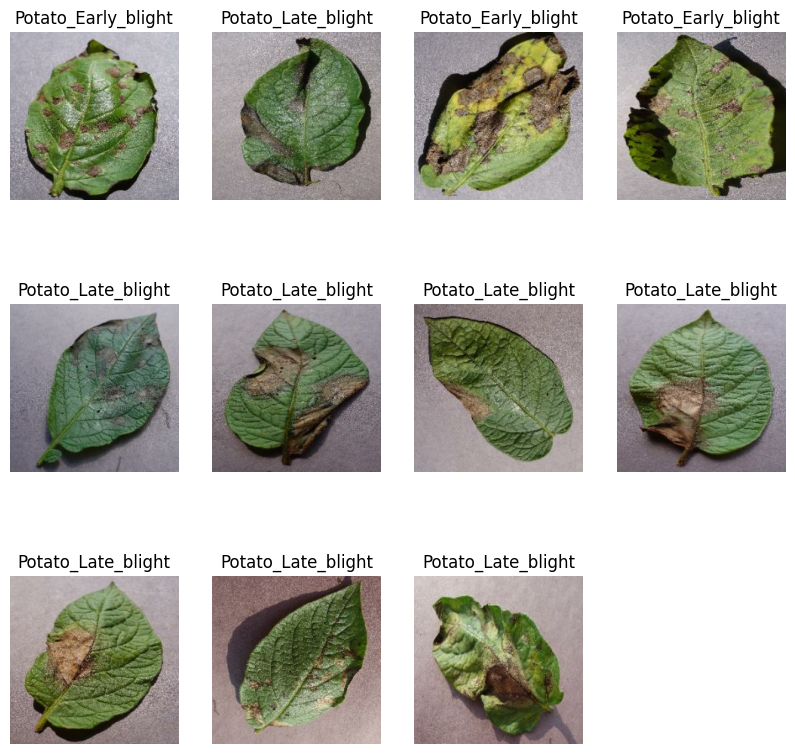

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(11):
        ax = plt.subplot(3,4,i+1)
        imag = image_batch[i].numpy().astype("uint8")
        plt.imshow(imag)
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=5)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
len(train_ds)

156

In [9]:
len(test_ds)

21

In [10]:
len(val_ds)

19

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
IMG_SIZE = 224
CHANNELS = 3
n_classes = 3

resize = layers.Resizing(IMG_SIZE,IMG_SIZE)
rescale = layers.Rescaling(1.0/255)
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
]) 

model = models.Sequential([
    resize,
    rescale,
    data_agumentation,
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dense(32, activation='relu'),
    layers.Flatten(),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24, 24, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │          55,299 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,539 (834.14 KB)

 Trainable params: 213,539 (834.14 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_ds,
    epochs=20,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.4993 - loss: 0.9150 - val_accuracy: 0.7656 - val_loss: 0.6777
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.7990 - loss: 0.4862 - val_accuracy: 0.8660 - val_loss: 0.3381
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.8626 - loss: 0.3237 - val_accuracy: 0.8612 - val_loss: 0.3451
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.9005 - loss: 0.2607 - val_accuracy: 0.8373 - val_loss: 0.3802
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 182ms/step - accuracy: 0.8891 - loss: 0.2644 - val_accuracy: 0.8852 - val_loss: 0.3114
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.9264 - loss: 0.2183 - val_accuracy: 0.8756 - val_loss: 0.3228
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 190ms/step - accuracy: 0.9099 - loss: 0.2246 - val_accuracy: 0.9234 - val_loss: 0.1792
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.9115 - loss: 0

In [15]:
score =model.evaluate(test_ds)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9960 - loss: 0.0344


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

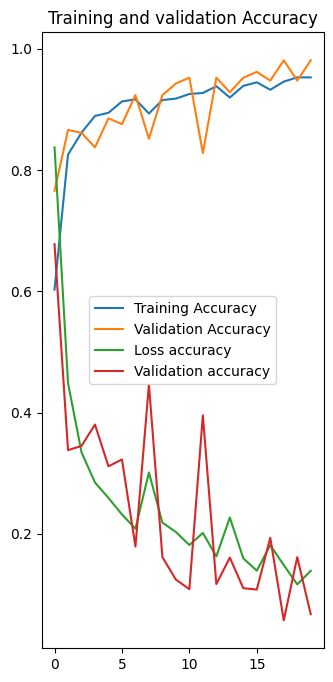

In [17]:
epochs=20
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.plot(range(epochs), loss, label='Loss accuracy')
plt.plot(range(epochs), val_loss, label='Validation accuracy')
plt.legend(loc='center')
plt.title('Training and validation Accuracy')

first image to predict
actual label: Potato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
predicted label: Potato_Late_blight


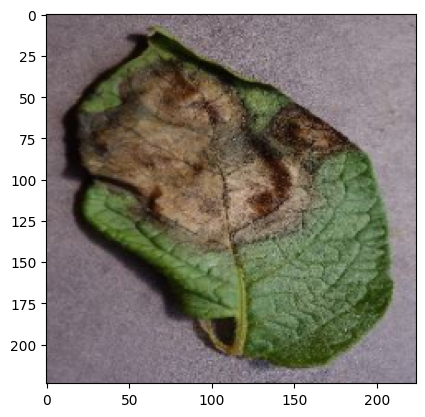

In [18]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label =  labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

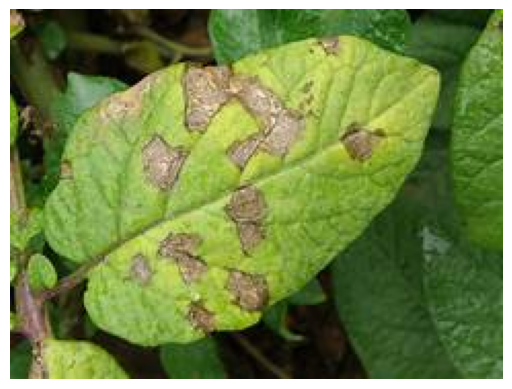

In [25]:
from PIL import Image

img_path = Image.open('unhealthy leaf.jpeg')
plt.imshow(img_path)
plt.axis('off')
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = 'unhealthy leaf.jpeg'
img = load_img(img_path, target_size=(224,224))  # Use load_img, not image.load_img
img_array = img_to_array(img)  # Use img_to_array, not image.img_to_array
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions, axis=1)[0]]  # Fix indexing
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: Potato_Early_blight


In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


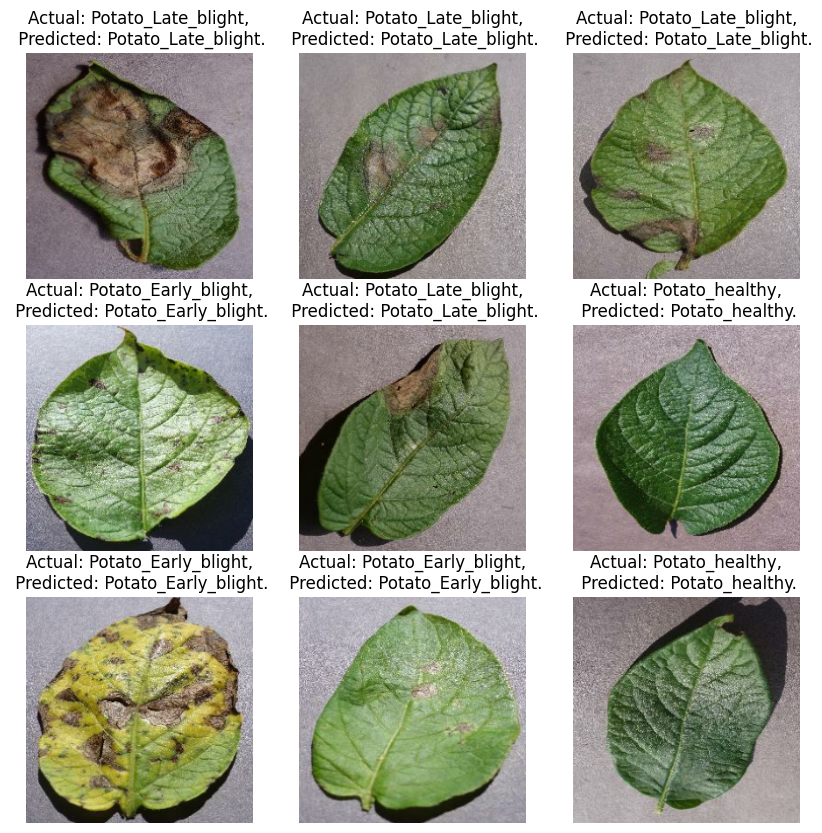

In [28]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.")
        plt.axis('off')